## Dimensionality reduction on Tabular Data

Dimensionality reduction on tabular data is the process of reducing the number of features (columns) in a dataset while retaining as much information as possible. Tabular data, typically organized into rows (observations) and columns (features), can have high-dimensional spaces where too many features may lead to redundancy, noise, or computational inefficiency.

In [ ]:
!pip install kaggle plotly umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


## Setup kaggle api and Install Required Libraries:

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aish26m","key":"668224c7c4db9fa4aa50c89ea98cee42"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!unzip red-wine-quality-cortez-et-al-2009.zip


Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 50.6MB/s]
Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


## Loading dataset

In [ ]:
data = pd.read_csv("winequality-red.csv")
X = data.drop("quality", axis=1)  # Features
y = data["quality"]              # Target


In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Standardize Data:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 3: Apply Dimensionality Reduction Techniques


### 3.1 Locally Linear Embedding (LLE)
A nonlinear dimensionality reduction technique.Focuses on preserving the local relationships of data points.


The scatter plot of the first two components shows the reduced data's local structure in 2D.

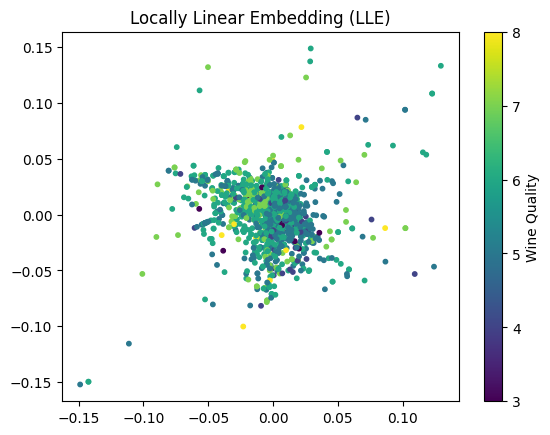

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_lle = lle.fit_transform(X_scaled)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', s=10)
plt.title("Locally Linear Embedding (LLE)")
plt.colorbar(label="Wine Quality")
plt.show()


### 3.2 t-SNE (Interactive Visualization with Plotly)

The t-SNE plot visualizes the high-dimensional wine dataset reduced to two dimensions, where points that are close together in the original feature space remain close in the 2D representation, revealing natural clusters and patterns in the wine data. The different colors represent different wine quality levels, showing how wines of similar quality tend to form clusters, though there is some overlap between quality levels indicating that some wines share similar characteristics despite having different quality ratings. This visualization helps uncover the underlying structure of the wine dataset by showing how wines with similar characteristics (based on all their chemical properties) are positioned relative to each other in a simplified 2D space.

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y.astype(str),
                 labels={'color': 'Wine Quality'}, title="t-SNE Visualization")
fig.show()


### 3.3 ISOMAP

The ISOMAP plot displays the wine dataset reduced from its high-dimensional space to two dimensions, where the colors indicate different wine quality levels and the positioning of points reflects the geodesic distances between wines in the original feature space. This visualization reveals how wines with similar qualities tend to be positioned near each other, with the color gradient showing a general trend from lower to higher quality wines across the plot space. Unlike t-SNE, ISOMAP attempts to preserve both local and global structure of the data, which can be observed in how the wine samples are distributed more continuously across the space, potentially reflecting the gradual changes in wine characteristics that correspond to quality differences.

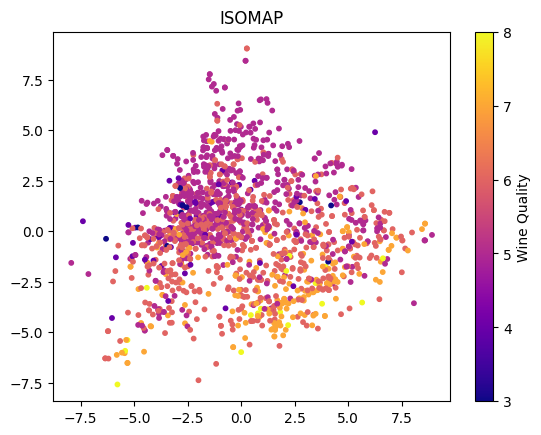

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='plasma', s=10)
plt.title("ISOMAP")
plt.colorbar(label="Wine Quality")
plt.show()


### 3.4 UMAP (Interactive Visualization with Plotly)

The UMAP visualization shows the wine dataset transformed from its original high-dimensional space into a 2D representation, where each point represents a wine sample and colors indicate different quality levels. The plot demonstrates UMAP's ability to preserve both local and global structure, revealing distinct clusters of wines with similar qualities while maintaining the overall relationships between different quality levels. Unlike ISOMAP, UMAP tends to create more compact, well-separated clusters, which can be seen in how wines of similar quality are grouped more tightly together in the visualization, while still showing some natural overlap between adjacent quality levels.

In [ ]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

fig = px.scatter(x=X_umap[:, 0], y=X_umap[:, 1], color=y.astype(str),
                 labels={'color': 'Wine Quality'}, title="UMAP Visualization")
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### 3.5 Multidimensional Scaling (MDS)

The MDS visualization represents the wine dataset in 2D space by attempting to preserve the pairwise distances between wine samples from their original high-dimensional feature space. The plot reveals a continuous distribution of wine samples where colors indicate quality levels, showing how wines of similar quality tend to be positioned near each other while maintaining the relative distances between all samples. Unlike UMAP and t-SNE which focus more on local structure, MDS tries to preserve all pairwise distances, resulting in a more spread-out visualization that shows gradual transitions between wine qualities rather than distinct clusters.


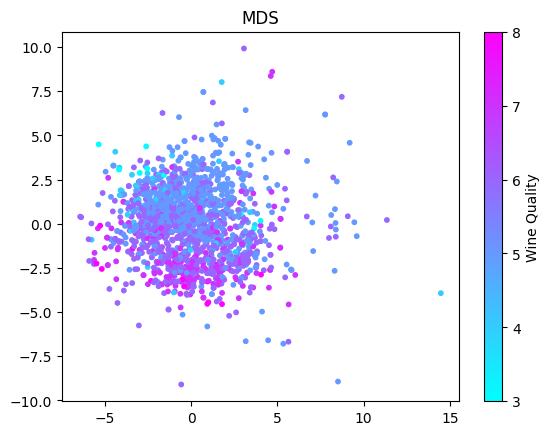

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='cool', s=10)
plt.title("MDS")
plt.colorbar(label="Wine Quality")
plt.show()


### 3.6 Randomized PCA

The Randomized PCA plot displays the wine dataset reduced to two principal components, where the colors indicate wine quality levels and the position of each point represents its values along the two most important directions of variance in the data. Unlike the non-linear methods (UMAP, t-SNE), this linear dimensionality reduction shows a more gradual, continuous spread of wine qualities without distinct clusters, suggesting that wine quality varies smoothly with respect to the main components of variation in the chemical properties.

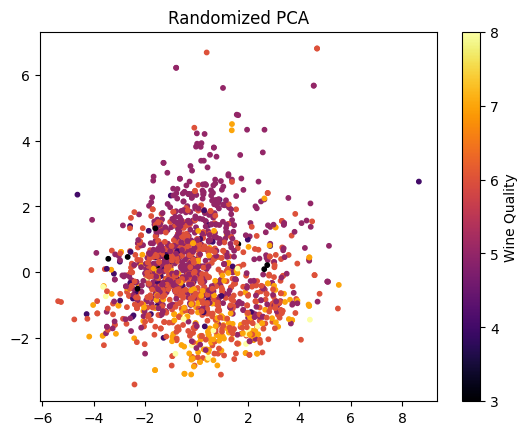

In [ ]:
from sklearn.decomposition import PCA

rpca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_rpca = rpca.fit_transform(X_scaled)

plt.scatter(X_rpca[:, 0], X_rpca[:, 1], c=y, cmap='inferno', s=10)
plt.title("Randomized PCA")
plt.colorbar(label="Wine Quality")
plt.show()


### 3.7 Kernel PCA

The Kernel PCA visualization shows the wine dataset transformed using a non-linear RBF kernel, where the colors represent different wine quality levels and the positioning reflects complex, non-linear relationships in the original chemical properties. Unlike standard PCA, this plot reveals more nuanced patterns in the data as the RBF kernel allows the transformation to capture non-linear relationships between features, showing how wines of similar quality tend to form more complex, curved patterns in the reduced space.

Performing Kernel PCA...
Kernel PCA done in 2.493s
Output shape: (1599, 2)



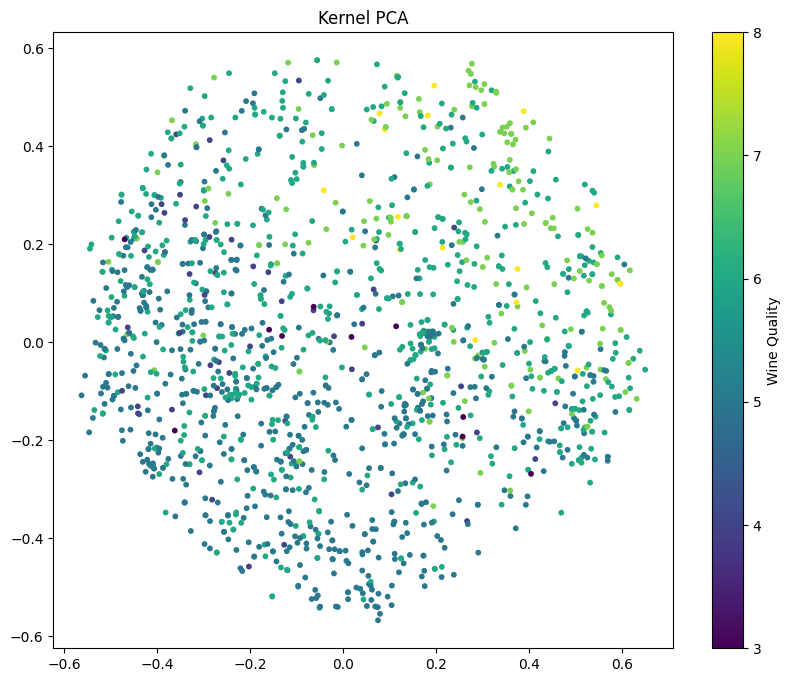

In [ ]:
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from time import time

# Perform Kernel PCA with fit_inverse_transform=True
print("Performing Kernel PCA...")
t0 = time()
kpca = KernelPCA(
    n_components=2,  # Changed to 2 for visualization
    kernel='rbf',
    random_state=42,
    fit_inverse_transform=True,
    gamma=None  # gamma=None means 1/n_features
)
X_kpca = kpca.fit_transform(X_scaled)
print(f"Kernel PCA done in {time() - t0:.3f}s")
print(f"Output shape: {X_kpca.shape}\n")

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
                     c=y, cmap='viridis', s=10)
plt.title("Kernel PCA")
plt.colorbar(label="Wine Quality")
plt.show()

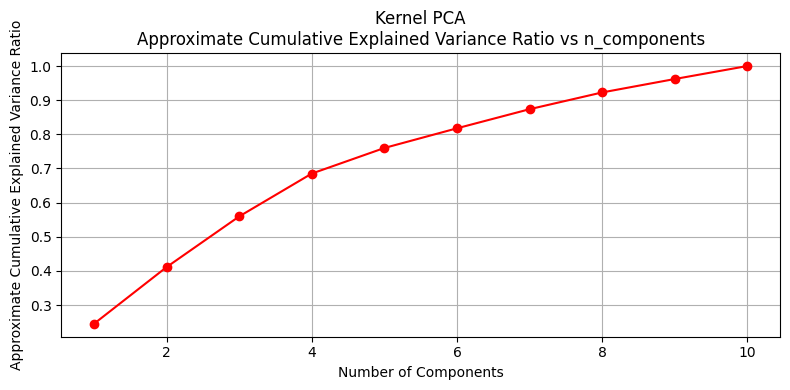

In [ ]:
# Plot the approximate cumulative explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(
    range(1, len(cumulative_var_ratio_kpca) + 1),
    cumulative_var_ratio_kpca,
    'ro-'
)
plt.xlabel('Number of Components')
plt.ylabel('Approximate Cumulative Explained Variance Ratio')
plt.title('Kernel PCA\nApproximate Cumulative Explained Variance Ratio vs n_components')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate explained variance ratio for Kernel PCA
explained_var_kpca = np.var(X_kpca, axis=0)
explained_var_ratio_kpca = explained_var_kpca / np.sum(explained_var_kpca)
cumulative_var_ratio_kpca = np.cumsum(explained_var_ratio_kpca)

### 3.8 Incremental PCA

The Incremental PCA visualization shows the wine dataset reduced to two dimensions by processing the data in small batches of 10 samples, where colors indicate wine quality levels and the position of each point represents its values along the two main components of variation. The plot appears similar to regular PCA with its continuous spread of wine qualities, but the batch processing approach makes it memory-efficient for large datasets while maintaining the overall structure of the data, showing the gradual transitions between different wine quality levels.

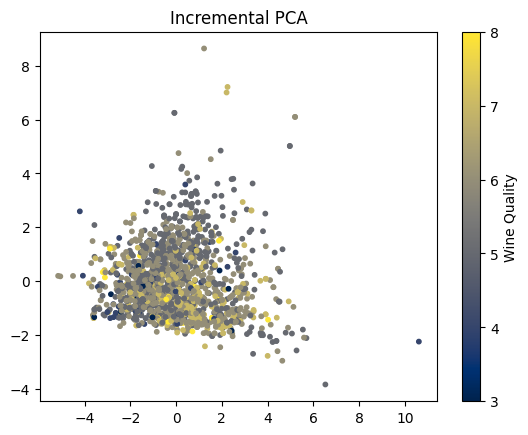

In [ ]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X_scaled)

plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='cividis', s=10)
plt.title("Incremental PCA")
plt.colorbar(label="Wine Quality")
plt.show()


### 3.9 Factor Analysis

The Factor Analysis plot reveals the wine dataset represented through two underlying latent factors, where colors indicate wine quality and the position of each point shows how these unobserved factors might explain the observed chemical properties of the wines. Unlike PCA which focuses on variance, this visualization suggests how hidden factors might generate the observed wine characteristics, showing a more spread-out distribution that indicates complex relationships between these latent factors and wine quality.

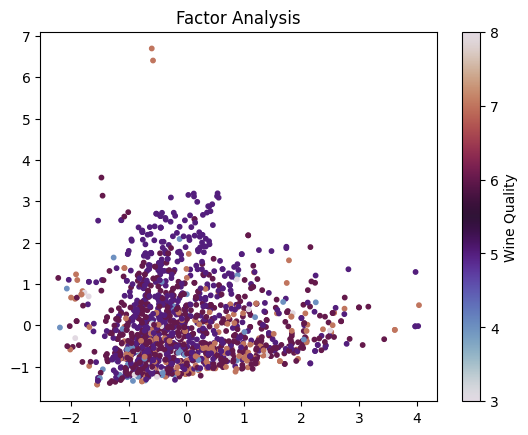

In [ ]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_scaled)

plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='twilight', s=10)
plt.title("Factor Analysis")
plt.colorbar(label="Wine Quality")
plt.show()


### 3.10 Autoencoders

The autoencoder visualization shows the wine dataset compressed into a 2D latent space through a neural network, where colors represent wine quality levels and the positions reflect the learned compressed representation of each wine's features. The plot demonstrates how the autoencoder has learned to encode the high-dimensional wine characteristics into a compact representation while preserving meaningful relationships between wine qualities, visible in how wines of similar quality tend to be encoded near each other in the latent space.

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


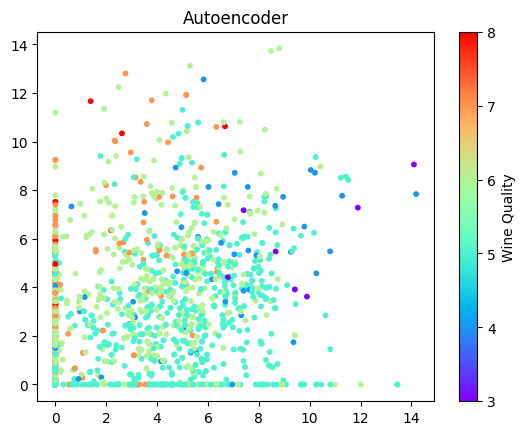

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, verbose=0)

# Encode Data
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_autoencoded = encoder_model.predict(X_scaled)

plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='rainbow', s=10)
plt.title("Autoencoder")
plt.colorbar(label="Wine Quality")
plt.show()
